# Chapter 6.2- Exploring Relationships

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Importing data

df = pd.read_csv(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/01.Data/insurance_data_cleaned.csv')

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Correlations:

In [4]:
#Creating correlation table
df_numeric = df[['age','bmi','children','charges']]

df_numeric.corr(numeric_only = True)

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


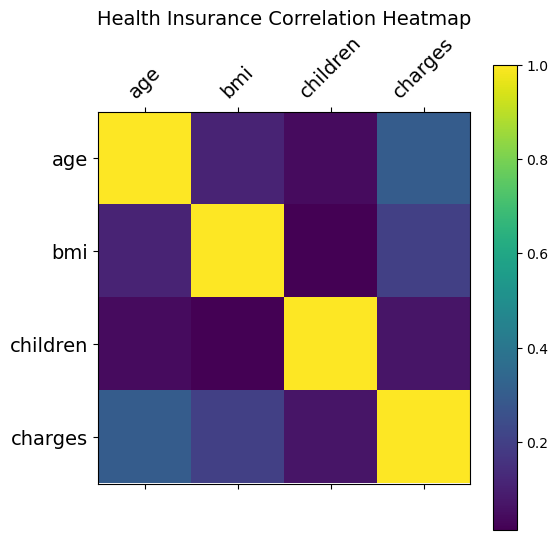

In [5]:
#Plotting correlation via heatmap using matplotlib

f = plt.figure(figsize=(6, 6)) 
plt.matshow(df_numeric.corr(numeric_only = True), fignum=f.number)
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14, rotation=45)
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14)
cb = plt.colorbar()
plt.title('Health Insurance Correlation Heatmap', fontsize=14)
plt.show()

### The darker purple color represent the weakest correlation. This means the two variables: number of children & BMI do not influence the insurance charges. Age seems to have a slightly higher correlation than the other two but is still a weak-moderate correlation. 

In [6]:
f.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/Correlation_Heatmap.png')

Text(0.5, 1.0, 'Health Insurance Correlation Heatmap')

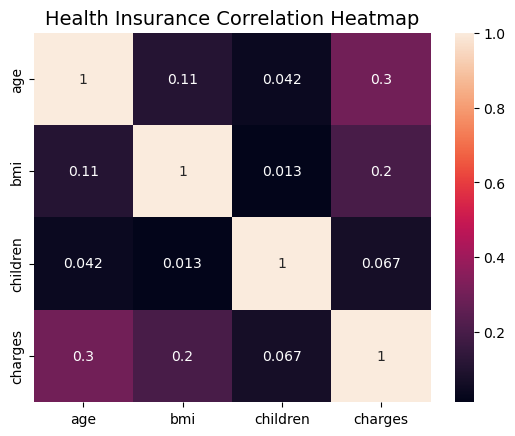

In [7]:
#Adding correlation values to heatmap

corr = sns.heatmap(df_numeric.corr(), annot = True)
plt.title('Health Insurance Correlation Heatmap', fontsize=14)

In [8]:
corr.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/Correlation_Heatmap_values.png')

### There is a weak-moderate correlation between age and charges.

## Scatterplot:

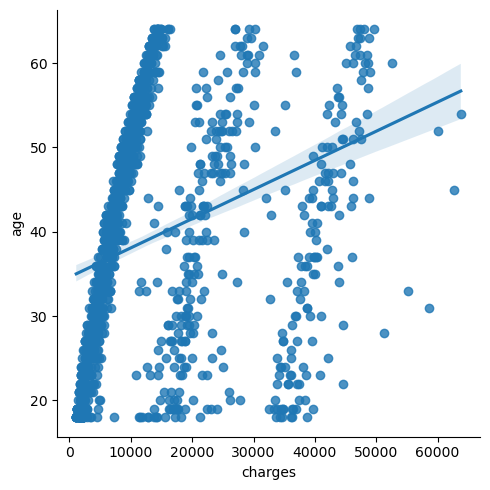

In [9]:
#Creating a scatterplot using seaborn library

sct = sns.lmplot(x = 'charges', y = 'age', data = df)

## This scatterplot shows the relationship between age and health insurance charges. The data is multi-nominal, with charges peaking at 10,000, 25,000, and 45,000. These charges do not increase much with age. The majority of charges are between 1,000-10,000 and this ranges almost equally throughout all ages. 

In [10]:
sct.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/Scatter_age_charges.png')

## Pair Plot:

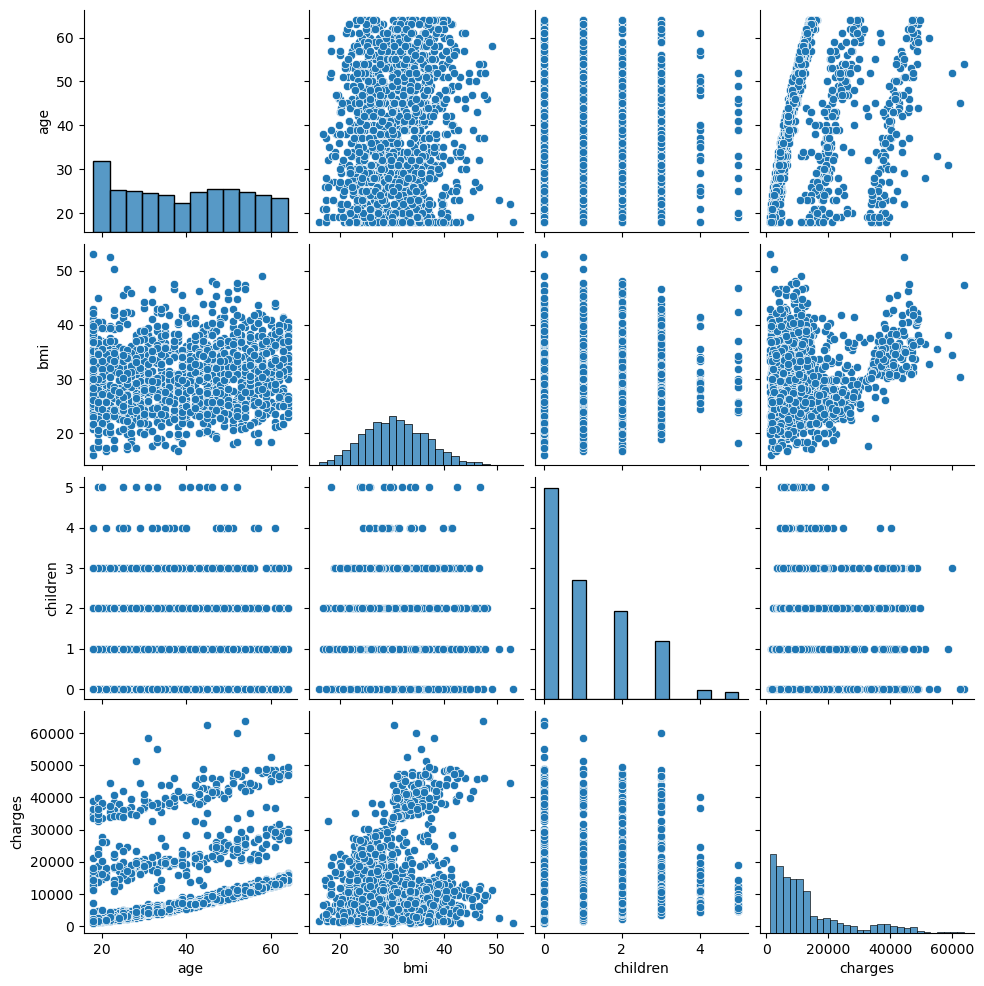

In [11]:
# Creating a pair plot using seaborn library

pplt = sns.pairplot(df)

### Age and BMI: BMI tends to stay between 20-40 but there are a few scattered after 40+ with about 2-3 outliers. 

### BMI and charges: Binominal with majority of charges falling between 1-3k and BMI ranging 20-45. There is a second smaller cluster of charges between 3-5k with BMIs between 30 and 40. 

### Children and charges: For people with 1-3 children, the pattern seems to be the same with charges ranging 1,000-50,000. Interstingly, for people who have 4 or 5 children, the charges are a lot less. They range from 1,000-22,000 for people with 4 children and 1,000-18,000 for people with 5 children. This would need to be further explored to see why.

In [12]:
pplt.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/Pair_plot.png')

## Categorical Plot:

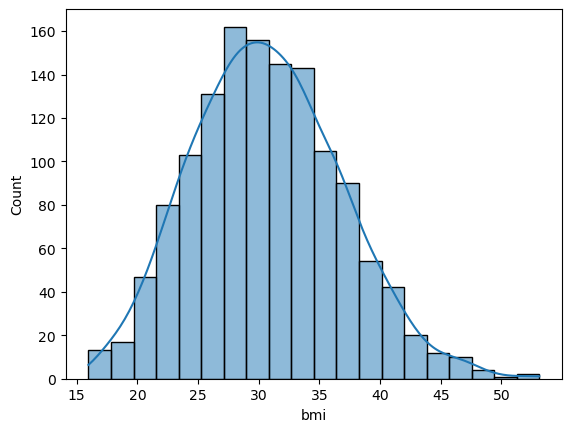

In [13]:
#Creating categorical plot for variable 'BMI'

ct = sns.histplot(df['bmi'], bins = 20, kde = True)

In [14]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
ct.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/BMI_histogram.png')

In [16]:
#Creating categorical groups for plot

df.loc[df['bmi'] < 18.5, 'BMI range'] = 'underweight'
df.loc[(df['bmi'] >= 18.5) & (df['bmi'] < 25), 'BMI range'] = 'healthy range'
df.loc[(df['bmi'] >= 25) & (df['bmi'] < 30), 'BMI range'] = 'overweight'
df.loc[(df['bmi'] >= 30) & (df['bmi'] < 40), 'BMI range'] = 'obesity'
df.loc[df['bmi'] >= 40, 'BMI range'] = 'severe obesity'

In [17]:
df['BMI range'].value_counts(dropna = False)

obesity           615
overweight        386
healthy range     225
severe obesity     91
underweight        20
Name: BMI range, dtype: int64

Text(0.5, 1.0, 'Charges Grouped by BMI Ranges')

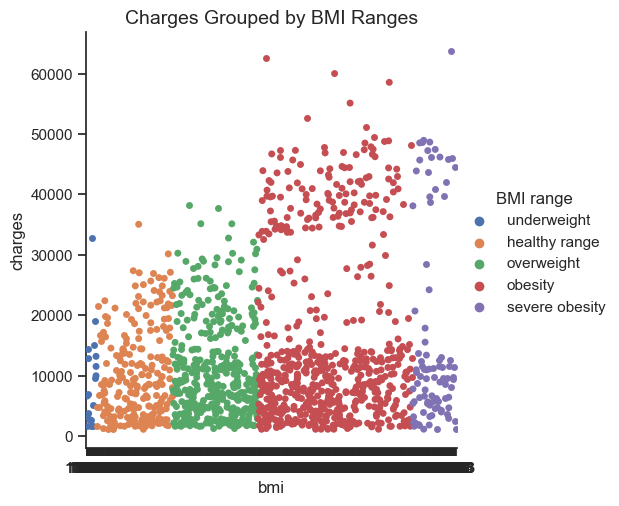

In [18]:
#Creating a categorical plot using seaborn library

sns.set(style="ticks")
cp = sns.catplot(x="bmi", y="charges", hue="BMI range", data=df)
plt.title('Charges Grouped by BMI Ranges', fontsize=14)

### The categorical scatterplot the distribution of the different BMI ranges alongside the charges. The charges under 15k show very few underweight and less severe obese BMIs. The charges under 15k show the majority of people with an obese, overweight, and healthy range. It is easy to spot the outliers and what range they fall under.

In [19]:
cp.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/Catplot_charges.png')

Text(0.5, 1.0, 'BMI Ranges by Sex')

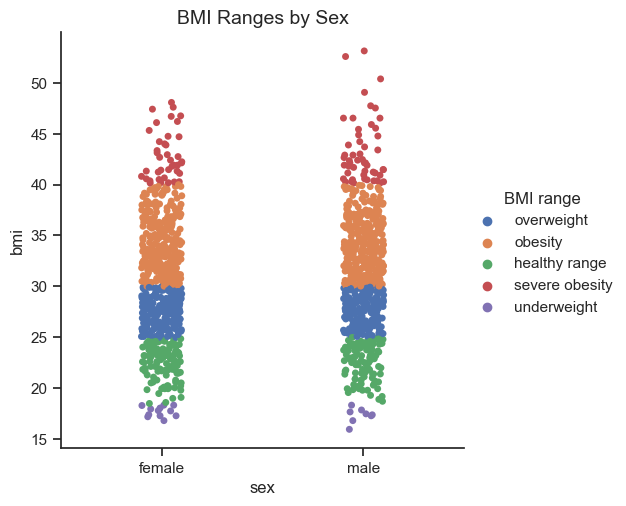

In [20]:
#Creating a categorical plot using seaborn library

cp_sex = sns.catplot(x="sex", y="bmi", hue="BMI range", data=df)
plt.title('BMI Ranges by Sex', fontsize=14)

In [21]:
cp_sex.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/Catplot_sex.png')

Text(0.5, 1.0, 'BMI Ranges by Smoker Status')

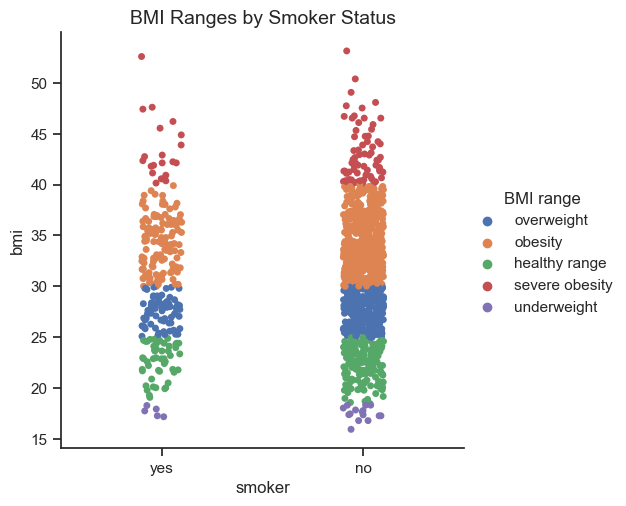

In [22]:
#Creating a categorical plot using seaborn library

cp_smoker = sns.catplot(x="smoker", y="bmi", hue="BMI range", data=df)
plt.title('BMI Ranges by Smoker Status', fontsize=14)

In [23]:
cp_smoker.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/Catplot_smoker.png')

Text(0.5, 1.0, 'BMI Ranges by Region')

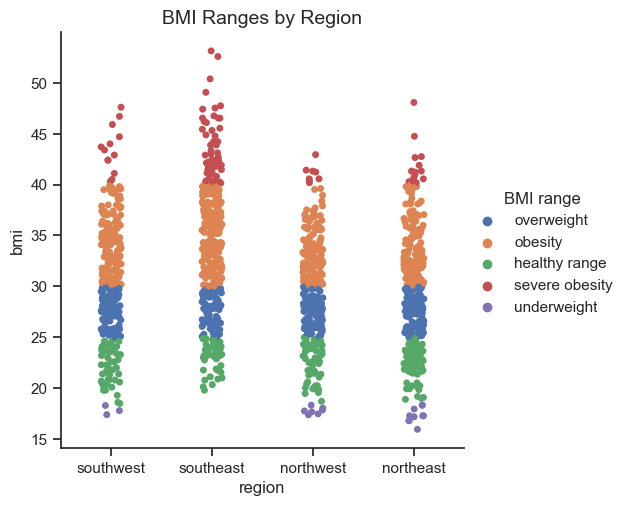

In [24]:
#Creating a categorical plot using seaborn library

cp_region = sns.catplot(x="region", y="bmi", hue="BMI range", data=df)
plt.title('BMI Ranges by Region', fontsize=14)

In [25]:
cp_region.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/Catplot_region.png')

Text(0.5, 1.0, 'Distribution of Charges by Smokers')

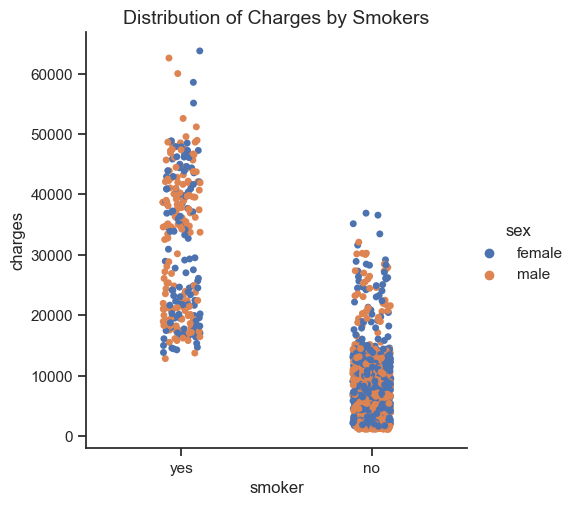

In [26]:
#Creating a categorical plot using seaborn library

cp_smoker = sns.catplot(x="smoker", y="charges", hue="sex", data=df)
plt.title('Distribution of Charges by Smokers', fontsize=14)

In [27]:
cp_smoker.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/Catplot_smoker.png')

Text(0.5, 1.0, 'Distribution of Charges by Sex')

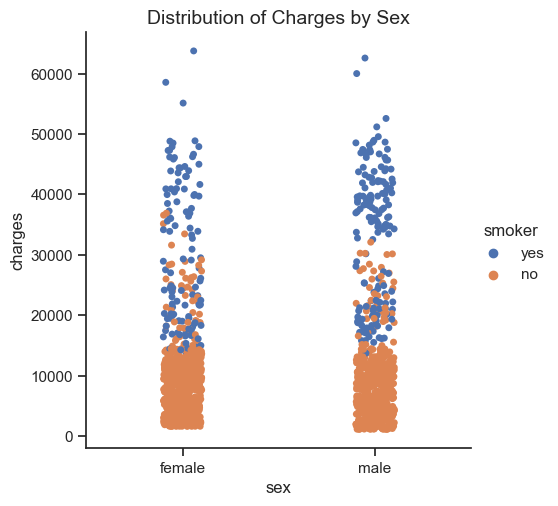

In [28]:
#Creating a categorical plot using seaborn library

cp_ins_sex = sns.catplot(x="sex", y="charges", hue="smoker", data=df)
plt.title('Distribution of Charges by Sex', fontsize=14)

In [29]:
cp_ins_sex.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/Catplot_ins_sex.png')

Text(0.5, 1.0, 'Distribution of Charges by Number of Children')

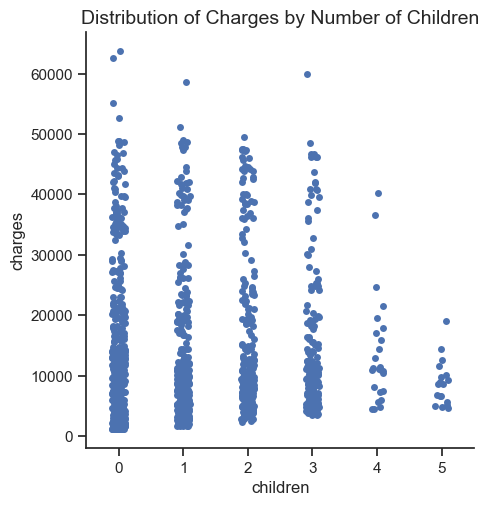

In [30]:
#Creating a categorical plot using seaborn library

cp_children = sns.catplot(x="children", y="charges", data=df)
plt.title('Distribution of Charges by Number of Children', fontsize=14)

In [32]:
cp_children.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/Catplot_children.png')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'overweight'),
  Text(1, 0, 'obesity'),
  Text(2, 0, 'healthy range'),
  Text(3, 0, 'severe obesity'),
  Text(4, 0, 'underweight')])

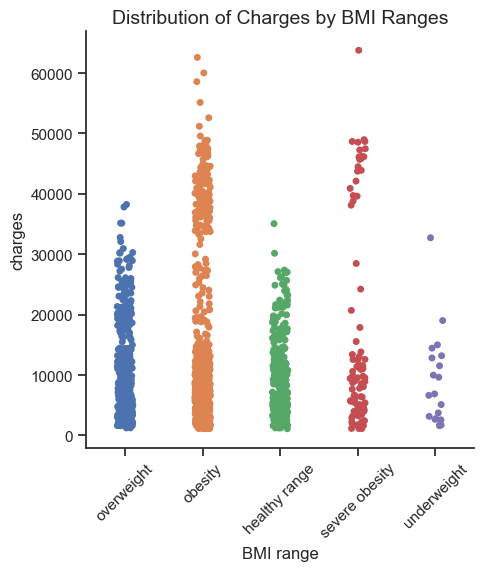

In [33]:
#Creating a categorical plot using seaborn library

cp_bmi_range = sns.catplot(x="BMI range", y="charges", hue="BMI range", data=df)
plt.title('Distribution of Charges by BMI Ranges', fontsize=14)
plt.xticks(rotation=45)

In [34]:
cp_bmi_range.figure.savefig(r'/Users/dorinasalam/Desktop/10-2023 Health Insurance Analysis/03. Visualizations/Catplot_bmi_range.png')

### Questions to explore:

### 1) How does BMI and/or being a smoker influence insurance charges?

#### For BMI, the majority of people fell under obese, overweight, and normal BMI. The correlation value was 0.2 which is a weak correlation. The minimum charges by the smokers had started at over 10k compared the non-smokers. Smoking caused a significant difference in charges.

### 2) Do insurance charges differ between the sexes?
#### No difference in charges between the sexes.

### 3) How do the charges differ regionally?
#### Regional data in the next achievement.

### 4) Does the number of dependents make any difference in the claims?
#### Yes, people who have 4+ children show less amounts in charge amounts.

### 5) Are there strong indicators that lead to higher charges?
#### So far, smoking and maybe obesity. (More exploration needed on obesity risk factor)

### 6) Can you predict insurance costs?
#### With the current visualizations, not yet. Prediction would be possible with regression analysis in the next acheivement. 

### Hypothesis: Smoking and a BMI over 30 will lead to higher charges in claims.